Trip Dates = February 1 through February 14 

In [1]:
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_

from flask import Flask, jsonify

import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [6]:
engine.execute('SELECT * FROM Measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [10]:
results = session.query(Measurements.date, func.sum(Measurements.prcp)).\
    filter(and_(Measurements.date > '2017-04-17',Measurements.prcp !=None)).\
    order_by(Measurements.date).group_by(Measurements.date).all()

results

[('2017-04-18', 3.36),
 ('2017-04-19', 0.2),
 ('2017-04-20', 0.78),
 ('2017-04-21', 8.38),
 ('2017-04-22', 4.960000000000001),
 ('2017-04-23', 0.45999999999999996),
 ('2017-04-24', 0.060000000000000005),
 ('2017-04-25', 0.0),
 ('2017-04-26', 0.39),
 ('2017-04-27', 0.42),
 ('2017-04-28', 4.24),
 ('2017-04-29', 8.04),
 ('2017-04-30', 6.42),
 ('2017-05-01', 0.81),
 ('2017-05-02', 0.05),
 ('2017-05-03', 0.03),
 ('2017-05-04', 0.08),
 ('2017-05-05', 0.38),
 ('2017-05-06', 0.06),
 ('2017-05-07', 0.12000000000000001),
 ('2017-05-08', 3.01),
 ('2017-05-09', 4.630000000000001),
 ('2017-05-10', 0.8600000000000001),
 ('2017-05-11', 0.6),
 ('2017-05-12', 0.16),
 ('2017-05-13', 0.24),
 ('2017-05-14', 1.22),
 ('2017-05-15', 0.88),
 ('2017-05-16', 0.42),
 ('2017-05-17', 0.15000000000000002),
 ('2017-05-18', 0.85),
 ('2017-05-19', 0.04),
 ('2017-05-20', 0.03),
 ('2017-05-21', 0.01),
 ('2017-05-22', 0.36),
 ('2017-05-23', 0.71),
 ('2017-05-24', 3.8899999999999997),
 ('2017-05-25', 2.22),
 ('2017-05-26'

In [11]:
date = [row[0] for row in results]
precipitation = [row[1] for row in results]

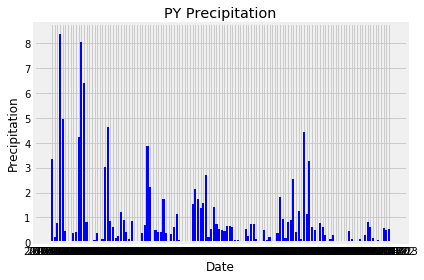

In [13]:
fig, ax = plt.subplots()
ax.bar(date, precipitation, color="blue")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("PY Precipitation")
fig.tight_layout()
plt.show()

In [15]:
# Load the query results for `months` and `sightings` into pandas
# and set the index to `months`

### BEGIN SOLUTION
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.head()
### END SOLUTION

,precipitation
date,
2017-04-18,3.36
2017-04-19,0.20
2017-04-20,0.78
2017-04-21,8.38
2017-04-22,4.96


In [17]:
results = session.query(Measurements.station).group_by(Measurements.station).count()
print("There are " + str(results) + " stations!")

There are 9 stations!


In [18]:
results = session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).\
order_by(func.count(Measurements.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [21]:
print("Station " + str(results[0][0]) + " had the most readings!")

Station USC00519281 had the most readings!


In [27]:
results = session.query(Measurements.date, Measurements.station, Measurements.tobs).\
    filter(Measurements.date > '2017-04-17').\
    order_by(Measurements.date).all()

results

[('2017-04-18', 'USC00519397', 75),
 ('2017-04-18', 'USC00513117', 70),
 ('2017-04-18', 'USC00514830', 76),
 ('2017-04-18', 'USC00517948', 75),
 ('2017-04-18', 'USC00519523', 76),
 ('2017-04-18', 'USC00519281', 68),
 ('2017-04-18', 'USC00516128', 71),
 ('2017-04-19', 'USC00519397', 74),
 ('2017-04-19', 'USC00513117', 70),
 ('2017-04-19', 'USC00514830', 83),
 ('2017-04-19', 'USC00519523', 74),
 ('2017-04-19', 'USC00519281', 67),
 ('2017-04-19', 'USC00516128', 71),
 ('2017-04-20', 'USC00519397', 78),
 ('2017-04-20', 'USC00513117', 75),
 ('2017-04-20', 'USC00514830', 74),
 ('2017-04-20', 'USC00519523', 76),
 ('2017-04-20', 'USC00519281', 76),
 ('2017-04-20', 'USC00516128', 69),
 ('2017-04-21', 'USC00519397', 73),
 ('2017-04-21', 'USC00513117', 70),
 ('2017-04-21', 'USC00514830', 70),
 ('2017-04-21', 'USC00519523', 70),
 ('2017-04-21', 'USC00519281', 69),
 ('2017-04-21', 'USC00516128', 70),
 ('2017-04-22', 'USC00519397', 76),
 ('2017-04-22', 'USC00513117', 74),
 ('2017-04-22', 'USC00514830

In [32]:
results = session.query(Measurements.station, func.count(Measurements.tobs)).\
    filter(Measurements.date > '2017-04-17').group_by(Measurements.station).\
    order_by(func.count(Measurements.tobs).desc()).all()

results

[('USC00519397', 123),
 ('USC00519281', 114),
 ('USC00516128', 109),
 ('USC00519523', 109),
 ('USC00513117', 105),
 ('USC00514830', 96),
 ('USC00517948', 13)]

In [82]:
results = session.query(Measurements.tobs).\
    filter(and_(Measurements.date > '2017-04-17',Measurements.station=='USC00519397')).all()

results_df = pd.DataFrame(results)
results_df.head()

,tobs
0,75
1,74
2,78
3,73
4,76


In [39]:
results[0]

('USC00519397', 65)

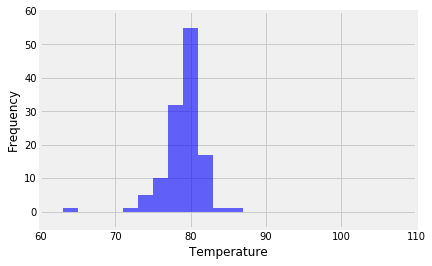

In [57]:
#plt.subplot(121)
results_df['tobs'].plot.hist(bins=12, color="blue", alpha=0.6)
plt.xlabel("Temperature")
plt.xlim([60, 110])
plt.ylim([-5, 60])
plt.figure()
plt.show()

In [80]:
def calc_temps(start,end):
    sel = [func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    range_averages = session.query(*sel).\
        filter(and_(Measurements.date >= start,Measurements.date <= end)).all()

    return range_averages

In [102]:
start_date='2017-02-01'
end_date='2017-02-14'
calc_temps(start_date,end_date)

[(59, 69.10344827586206, 80)]

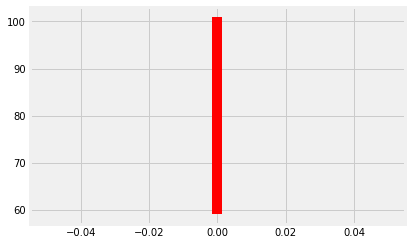

In [96]:
temp_range = 21
plt.errorbar(0, 80, yerr=temp_range, color='r', marker='o', markersize=5, linestyle='dashed', linewidth=10)
plt.show()

In [ ]:
session.delete(engine)